In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing


#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

### Read Data from CSV

In [4]:
# Read data from csv and print the head
data = pd.read_csv('UNdata_Export_20181124_222557311.csv')
data = data.drop(columns=['Value Footnotes'])
data.head(5)

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


### Lets normalize data

In [5]:
# Normalize the value column and drop old column

# Create x, where x the 'Value' column's values as floats
x = data[['Value']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized['normalized'] = pd.DataFrame(x_scaled)
df_normalized.drop(columns=0,inplace=True)

data_new = pd.concat([data,df_normalized ], axis=1)
data_new.drop(columns='Value',inplace=True)

In [6]:
# Check new dataframe with normalized value
data_new.head()

,Country or Area,Year,normalized
0,Afghanistan,2014,0.065098
1,Afghanistan,2013,0.060106
2,Afghanistan,2012,0.055568
3,Afghanistan,2011,0.050937
4,Afghanistan,2010,0.040750


#### Using tsfresh to extract features from data

In [7]:
# Use TSFresh library to extract features from data 
from tsfresh import extract_features
extracted_features = extract_features(data_new, column_id="Country or Area", column_sort="Year")

Feature Extraction: 100%|██████████| 10/10 [00:22<00:00,  1.94s/it]


In [8]:
#Check extracted features
extracted_features.head()

variable,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,normalized__time_reversal_asymmetry_statistic__lag_1,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.017846,0.070496,-0.587144,-0.513169,0.919234,0.040750,1.0,0.024348,0.0,NaN,...,0.000027,0.000051,0.000067,0.0,0.0,0.0,0.0,0.0,0.000527,0.0
Albania,1.756639,0.608947,-0.553129,-0.762668,0.820387,0.458435,1.0,0.153830,0.0,NaN,...,0.023510,0.046566,0.067732,0.0,0.0,0.0,0.0,0.0,0.054615,0.0
Algeria,0.168184,0.177709,-0.644761,-0.473405,1.142363,0.127343,1.0,0.056948,0.0,NaN,...,0.000606,0.001139,0.001616,0.0,0.0,0.0,0.0,0.0,0.003138,0.0
Andorra,6.181426,0.879172,-0.588723,-0.495535,0.910084,0.825183,1.0,0.151793,0.0,NaN,...,0.108921,0.217205,0.347705,0.0,0.0,0.0,0.0,0.0,0.086423,0.0
Angola,0.155135,0.215200,-0.538600,-0.569763,0.750344,0.101874,1.0,0.114711,0.0,NaN,...,0.000959,0.001621,0.001722,0.0,0.0,0.0,0.0,0.0,0.005768,0.0


In [9]:
#Check shape of new data with extracted features
extracted_features.shape

(210, 794)

In [10]:
#Check if any columns contains Nan values (null values)
list_cols_with_nan = extracted_features.columns[extracted_features.isna().any()].tolist()
len(list_cols_with_nan)

552

In [11]:
# it seems 552 columns out of 794 have some null values

In [12]:
#lets replace nan value with 0.0
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
data_after_impute = impute(extracted_features)

 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_tre

In [13]:
#lets check if any column has any nan value
list_cols_with_nan_after_impute = data_after_impute.columns[data_after_impute.isna().any()].tolist()
len(list_cols_with_nan_after_impute)

0

In [14]:
#we dont have any nan values 
# lets reset the index
data_after_impute = data_after_impute.reset_index()

In [25]:
# we need to give labels to countries 
data_countries = pd.read_excel('Developing countries.xlsx')

developed_countries = data_countries [data_countries['Value'] == 0]
developing_countries = data_countries [data_countries['Value'] == 1] 

list_developed_countries = developed_countries['Countries']
list_developing_countries = developing_countries['Countries']

list_developed_countries = list(list_developed_countries)
list_developing_countries = list(list_developing_countries)

data_after_impute['label'] = -1

for i,da in data_after_impute.iterrows():
    if da['id'] in list_developed_countries:
        val = 0
        data_after_impute.at[i,'label'] = val
    elif da['id'] not in list_developed_countries:
        val = 1
        data_after_impute.at[i,'label'] = val

In [26]:
# check new df with added column as label 
data_after_impute.head()

variable,id,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation,label
0,Afghanistan,0.017846,0.070496,-0.587144,-0.513169,0.919234,0.040750,1.0,0.024348,0.0,...,0.000051,0.000067,0.0,0.0,0.0,0.0,0.0,0.000527,0.0,1
1,Albania,1.756639,0.608947,-0.553129,-0.762668,0.820387,0.458435,1.0,0.153830,0.0,...,0.046566,0.067732,0.0,0.0,0.0,0.0,0.0,0.054615,0.0,1
2,Algeria,0.168184,0.177709,-0.644761,-0.473405,1.142363,0.127343,1.0,0.056948,0.0,...,0.001139,0.001616,0.0,0.0,0.0,0.0,0.0,0.003138,0.0,1
3,Andorra,6.181426,0.879172,-0.588723,-0.495535,0.910084,0.825183,1.0,0.151793,0.0,...,0.217205,0.347705,0.0,0.0,0.0,0.0,0.0,0.086423,0.0,1
4,Angola,0.155135,0.215200,-0.538600,-0.569763,0.750344,0.101874,1.0,0.114711,0.0,...,0.001621,0.001722,0.0,0.0,0.0,0.0,0.0,0.005768,0.0,1


In [30]:
# data_after_impute[['id','label']].head(30)

In [33]:
#Split data into X(features),y 
y = data_after_impute['label']
X = data_after_impute.drop(columns=['id','label'])

In [34]:
y.value_counts()

1    175
0     35
Name: label, dtype: int64

In [35]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

#### Lets try different classifiers on the data

##### KNN

In [37]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)
print(f1_score(y_test,pred) )

             precision    recall  f1-score   support

          0       0.56      0.42      0.48        12
          1       0.91      0.94      0.93        72

avg / total       0.86      0.87      0.86        84

Accuracy is:  0.8690476190476191
0.9251700680272109


###### KNN with k ranging from 1 to 15

[0.8928571428571429, 0.8452380952380952, 0.8452380952380952, 0.8333333333333334, 0.8809523809523809, 0.8809523809523809, 0.8928571428571429, 0.8809523809523809, 0.8690476190476191, 0.8690476190476191, 0.8690476190476191, 0.8809523809523809, 0.8571428571428571, 0.8690476190476191, 0.8809523809523809]


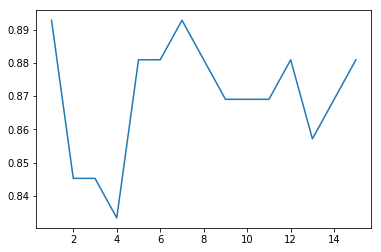

In [38]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores)  

#### Random Forest Classifier

In [39]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8946253746253747
Accuracy Score:  0.8928571428571429


#### Fine tuninng Random Forest for different number of estimators

[0.8763565201921366, 0.8946253746253747, 0.8862973760932946, 0.8862973760932946, 0.8862973760932946, 0.8763565201921366, 0.8862973760932946, 0.8862973760932946, 0.8862973760932946, 0.8862973760932946, 0.9010852161537093, 0.9010852161537093]


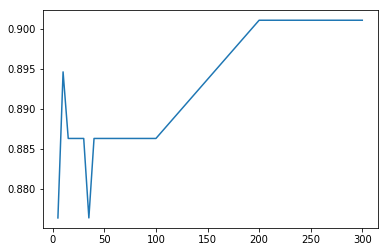

In [40]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

#### Lets fine tune for number of features with best number of estimator from above analysis

In [43]:
rf_classifier = RandomForestClassifier(n_estimators=30, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8862973760932946
Accuracy Score:  0.8928571428571429


[0.8862973760932946, 0.8908974084386377, 0.8846927720167156, 0.9010852161537093, 0.8908974084386377, 0.8763565201921366, 0.9151424287856071, 0.9010852161537093, 0.9010852161537093, 0.9010852161537093, 0.9010852161537093]


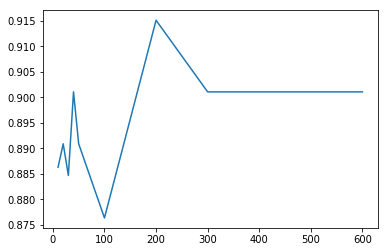

In [44]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=30,random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

#### Logistic regression model

In [45]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8336109437573095
Accuracy Score:  0.8214285714285714


#### Extra tree classifier

In [46]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=5,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8809523809523809
Accuracy Score:  0.8809523809523809


[0.8809523809523809, 0.8908974084386377, 0.8862973760932946, 0.8809523809523809, 0.9047619047619048, 0.9151424287856071, 0.9285714285714286, 0.8862973760932946, 0.8862973760932946, 0.9010852161537093, 0.8862973760932946, 0.8862973760932946]


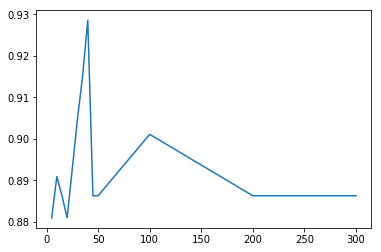

In [47]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [48]:
model = ExtraTreesClassifier(n_estimators=20,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8809523809523809
Accuracy Score:  0.8809523809523809


#### fine tune for max_features

[0.8846927720167156, 0.8862973760932946, 0.9010852161537093, 0.9047619047619048, 0.8809523809523809, 0.9010852161537093, 0.8908974084386377, 0.9010852161537093, 0.9010852161537093, 0.8862973760932946, 0.8706563706563706]


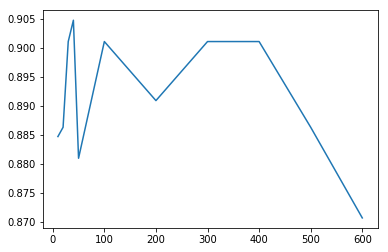

In [49]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=20,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

#### Recursive Feature Elimination 

In [50]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 770
Best features : Index(['normalized__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"slope"',
       'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"stderr"',
       'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"',
       'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"rvalue"',
       'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"slope"',
       'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"stderr"',
       'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_5__attr_"intercept"',
       'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_5__attr_"rvalue"',
       'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_5__attr_"slope"',
       'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_5__attr_"stderr"',
       ...
       'normalized__time_reversal_asymmetry_statistic__lag_1',
       'normalized__time_reversal_asymmetry_statistic__lag

In [51]:
cols = X_train.columns[rfecv.support_]

In [52]:
X = X[cols]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [54]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

          0       0.50      0.42      0.45        12
          1       0.91      0.93      0.92        72

avg / total       0.85      0.86      0.85        84

Accuracy is:  0.8571428571428571


[0.8928571428571429, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8809523809523809, 0.8809523809523809, 0.8928571428571429, 0.8809523809523809, 0.8690476190476191, 0.8571428571428571, 0.8690476190476191, 0.8809523809523809, 0.8571428571428571, 0.8690476190476191, 0.8809523809523809]


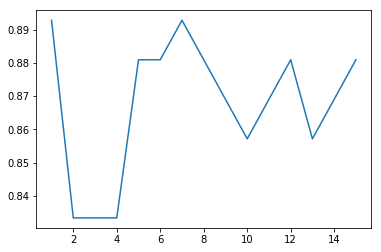

In [55]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores) 

[0.9010852161537093, 0.9047619047619048, 0.8908974084386377, 0.9047619047619048, 0.8908974084386377, 0.8763565201921366, 0.8908974084386377, 0.8908974084386377, 0.8908974084386377, 0.8908974084386377, 0.8908974084386377, 0.9010852161537093]


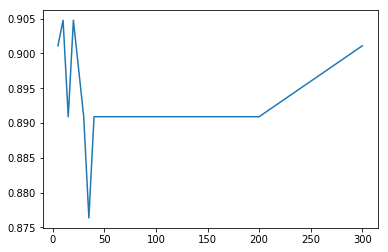

In [56]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [57]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

          0       0.67      0.67      0.67        12
          1       0.94      0.94      0.94        72

avg / total       0.90      0.90      0.90        84

Accuracy is:  0.9047619047619048
